week 1


In [ ]:
!pip install faker

In [ ]:
import numpy as np
import pandas as pd
import random
from faker import Faker
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import pickle

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  f1_score, roc_auc_score, classification_report,ConfusionMatrixDisplay,confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [ ]:

from datetime import datetime, timedelta

# Categories, statuses, priorities
categories = ['Development', 'Design', 'Testing', 'Documentation', 'Deployment']
statuses = ['Pending', 'In Progress', 'Completed']
priorities = ['Low', 'Medium', 'High']
employees = ['Ava', 'Liam', 'Noah', 'Emma', 'Olivia', 'Sophia', 'James', 'Mia', 'Lucas', 'Isabella']

# Keyword clues for each category
keywords = {
    'Development': ['API', 'backend', 'database', 'feature', 'module', 'logic', 'function'],
    'Design': ['UI', 'UX', 'layout', 'color', 'banner', 'mockup', 'design'],
    'Testing': ['bug', 'test', 'validation', 'QA', 'error', 'performance', 'cases'],
    'Documentation': ['guide', 'manual', 'docs', 'instructions', 'notes', 'reference', 'summary'],
    'Deployment': ['server', 'deploy', 'CI/CD', 'container', 'environment', 'production', 'cloud']
}

data = []
for i in range(1, 1501):  # 1500 samples
    category = random.choice(categories)

    # Make estimated hours dependent on category
    if category == 'Development':
        hours = random.randint(10, 40)
    elif category == 'Testing':
        hours = random.randint(8, 25)
    elif category == 'Design':
        hours = random.randint(5, 20)
    elif category == 'Documentation':
        hours = random.randint(2, 10)
    else:  # Deployment
        hours = random.randint(8, 30)

    # Priority is based on hours and category
    if hours > 25:
        priority = 'High'
    elif hours > 10:
        priority = 'Medium'
    else:
        priority = 'Low'

    # Status depends on estimated hours
    if hours < 8:
        status = random.choice(['In Progress', 'Completed'])
    elif hours > 25:
        status = random.choice(['Pending', 'In Progress'])
    else:
        status = 'In Progress'

    # Smart task descriptions with category-specific words
    kw = random.sample(keywords[category], 2)
    desc = f"{category} task to handle {kw[0]} and {kw[1]}."

    # Logical deadline (shorter for low priority)
    if priority == 'High':
        deadline = datetime.today() + timedelta(days=random.randint(3, 10))
    elif priority == 'Medium':
        deadline = datetime.today() + timedelta(days=random.randint(10, 30))
    else:
        deadline = datetime.today() + timedelta(days=random.randint(30, 60))

    data.append({
        'Task_ID': i,
        'Task_Description': desc,
        'Deadline': deadline.strftime('%Y-%m-%d'),
        'Assigned_To': random.choice(employees),
        'Estimated_Hours': hours,
        'Category': category,
        'Status': status,
        'Priority': priority
    })

# Create dataframe
df = pd.DataFrame(data)
df.to_csv('smart_task_dataset.csv', index=False)
# print(df.head(10))
# print("\n✅ Smart synthetic dataset created with meaningful correlations.")



In [ ]:
df=pd.read_csv('/content/smart_task_dataset.csv')
df

,Task_ID,Task_Description,Deadline,Assigned_To,Estimated_Hours,Category,Status,Priority
0,1,Testing task to handle cases and QA.,2025-11-10,Sophia,20,Testing,In Progress,Medium
1,2,Documentation task to handle notes and summary.,2025-12-04,Isabella,4,Documentation,In Progress,Low
2,3,Testing task to handle QA and error.,2025-11-13,Noah,13,Testing,In Progress,Medium
3,4,Deployment task to handle container and deploy.,2025-10-18,Ava,27,Deployment,Pending,High
4,5,Documentation task to handle docs and notes.,2025-11-14,James,4,Documentation,Completed,Low
...,...,...,...,...,...,...,...,...
1495,1496,Deployment task to handle deploy and environment.,2025-11-06,Noah,12,Deployment,In Progress,Medium
1496,1497,Documentation task to handle instructions and ...,2025-11-17,Mia,6,Documentation,Completed,Low
1497,1498,Testing task to handle error and test.,2025-11-24,Isabella,9,Testing,In Progress,Low
1498,1499,Design task to handle UI and design.,2025-12-11,Lucas,5,Design,Completed,Low


In [ ]:
df.head()

,Task_ID,Task_Description,Deadline,Assigned_To,Estimated_Hours,Category,Status,Priority
0,1,Testing task to handle cases and QA.,2025-11-10,Sophia,20,Testing,In Progress,Medium
1,2,Documentation task to handle notes and summary.,2025-12-04,Isabella,4,Documentation,In Progress,Low
2,3,Testing task to handle QA and error.,2025-11-13,Noah,13,Testing,In Progress,Medium
3,4,Deployment task to handle container and deploy.,2025-10-18,Ava,27,Deployment,Pending,High
4,5,Documentation task to handle docs and notes.,2025-11-14,James,4,Documentation,Completed,Low


In [ ]:
df.drop(columns=['Task_ID','Deadline'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task_Description  1500 non-null   object
 1   Assigned_To       1500 non-null   object
 2   Estimated_Hours   1500 non-null   int64 
 3   Category          1500 non-null   object
 4   Status            1500 non-null   object
 5   Priority          1500 non-null   object
dtypes: int64(1), object(5)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,Estimated_Hours
count,1500.00000
mean,16.01600
std,8.95879
min,2.00000
25%,9.00000
50%,15.00000
75%,21.00000
max,40.00000


In [ ]:
df.isnull().sum()

,0
Task_Description,0
Assigned_To,0
Estimated_Hours,0
Category,0
Status,0
Priority,0


In [ ]:
df.dtypes

,0
Task_Description,object
Assigned_To,object
Estimated_Hours,int64
Category,object
Status,object
Priority,object


In [ ]:
df.columns

Index(['Task_Description', 'Assigned_To', 'Estimated_Hours', 'Category',
       'Status', 'Priority'],
      dtype='object')

Text(0.5, 1.0, 'Priority Distributions \n (0: High || 1: Low || 2:Medium)')

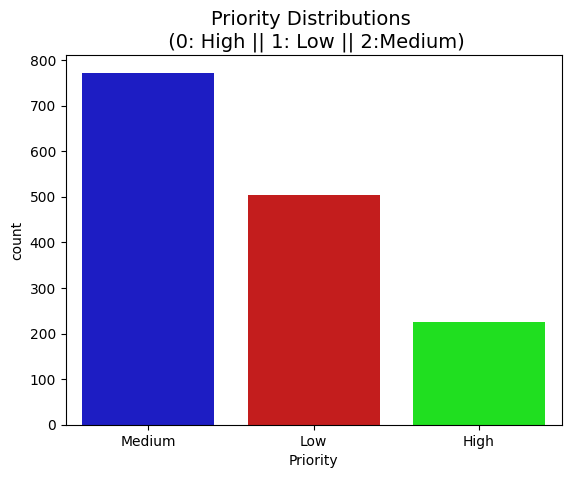

In [ ]:
colors = ["#0101DF", "#DF0101","#00FF00"]

sns.countplot(x='Priority', data=df, palette=colors)
plt.title('Priority Distributions \n (0: High || 1: Low || 2:Medium)', fontsize=14)

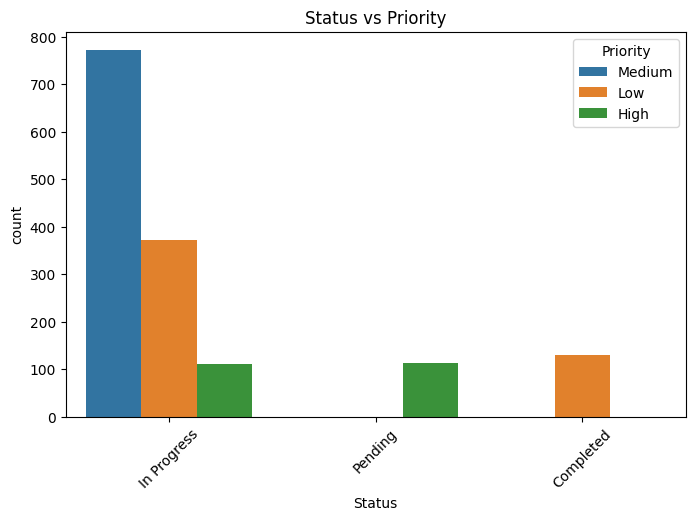

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Status', hue='Priority', data=df)
plt.title("Status vs Priority")
plt.xticks(rotation=45)
plt.show()

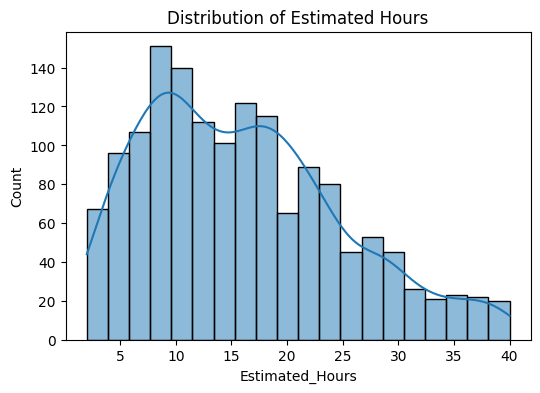

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Estimated_Hours'], kde=True, bins=20)
plt.title("Distribution of Estimated Hours")
plt.show()

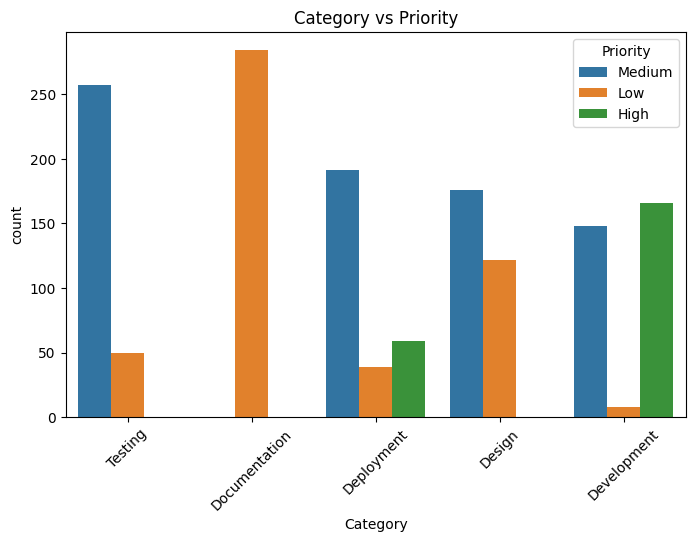

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category', hue='Priority', data=df)
plt.title("Category vs Priority")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Task_Description']=df['Task_Description'].str.replace('[^a-zA-z0-9 ]',"",regex=True)
df['Task_Description']

,Task_Description
0,Testing task to handle cases and QA
1,Documentation task to handle notes and summary
2,Testing task to handle QA and error
3,Deployment task to handle container and deploy
4,Documentation task to handle docs and notes
...,...
1495,Deployment task to handle deploy and environment
1496,Documentation task to handle instructions and ...
1497,Testing task to handle error and test
1498,Design task to handle UI and design


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
ps=PorterStemmer()
df['Task_Description']=df['Task_Description'].apply(lambda row:[ps.stem(token.lower()) for token in nltk.word_tokenize(row)]).apply(lambda token:" ".join(token))
df['Task_Description']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Task_Description
0,test task to handl case and qa
1,document task to handl note and summari
2,test task to handl qa and error
3,deploy task to handl contain and deploy
4,document task to handl doc and note
...,...
1495,deploy task to handl deploy and environ
1496,document task to handl instruct and manual
1497,test task to handl error and test
1498,design task to handl ui and design


In [ ]:
sw=stopwords.words('english')

In [ ]:
df['Task_Description']=df['Task_Description'].apply(lambda row:[token for token in nltk.word_tokenize(row) if token not in sw]).apply(lambda token:" ".join(token))
df['Task_Description']

,Task_Description
0,test task handl case qa
1,document task handl note summari
2,test task handl qa error
3,deploy task handl contain deploy
4,document task handl doc note
...,...
1495,deploy task handl deploy environ
1496,document task handl instruct manual
1497,test task handl error test
1498,design task handl ui design


week 2

In [ ]:
vec=TfidfVectorizer(stop_words='english')
data_vec=vec.fit_transform(df['Task_Description'])
print(data_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7252 stored elements and shape (1500, 39)>
  Coords	Values
  (0, 35)	0.42360252119337194
  (0, 34)	0.1639463753071595
  (0, 20)	0.1639463753071595
  (0, 4)	0.6253041257374794
  (0, 30)	0.6130243277567322
  (1, 34)	0.16082576699948084
  (1, 20)	0.16082576699948084
  (1, 14)	0.4280213185713627
  (1, 27)	0.6064083583810225
  (1, 33)	0.63034657060392
  (2, 35)	0.42408249282994775
  (2, 34)	0.1641321381535306
  (2, 20)	0.1641321381535306
  (2, 30)	0.6137189277062917
  (2, 16)	0.6241990063276917
  (3, 34)	0.14988907027216788
  (3, 20)	0.14988907027216788
  (3, 10)	0.792615174884216
  (3, 8)	0.5716884796540455
  (4, 34)	0.16199278464423977
  (4, 20)	0.16199278464423977
  (4, 14)	0.43112721659022546
  (4, 27)	0.6108087058338174
  (4, 13)	0.6233447869672063
  (5, 34)	0.14910499876987696
  :	:
  (1494, 14)	0.4280213185713627
  (1494, 27)	0.6064083583810225
  (1494, 33)	0.63034657060392
  (1495, 34)	0.15071781091728276
  (1495, 20)	0.1

In [ ]:
le_category = LabelEncoder()
df['Category']= le_category.fit_transform(df['Category'])

In [ ]:
le_Priority = LabelEncoder()
df['Priority']= le_Priority.fit_transform(df['Priority'])

In [ ]:
le_Status = LabelEncoder()
df['Status']= le_Status.fit_transform(df['Status'])

In [ ]:
df

,Task_Description,Assigned_To,Estimated_Hours,Category,Status,Priority
0,test task handl case qa,Sophia,20,4,1,2
1,document task handl note summari,Isabella,4,3,1,1
2,test task handl qa error,Noah,13,4,1,2
3,deploy task handl contain deploy,Ava,27,0,2,0
4,document task handl doc note,James,4,3,0,1
...,...,...,...,...,...,...
1495,deploy task handl deploy environ,Noah,12,0,1,2
1496,document task handl instruct manual,Mia,6,3,0,1
1497,test task handl error test,Isabella,9,4,1,1
1498,design task handl ui design,Lucas,5,1,0,1


In [ ]:
X=df[['Task_Description','Estimated_Hours','Status']]
# print(X)
y=df['Category']
# print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size=0.2, random_state=42)

************ SVC() ************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        65

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


************ MultinomialNB() ************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        65

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
we

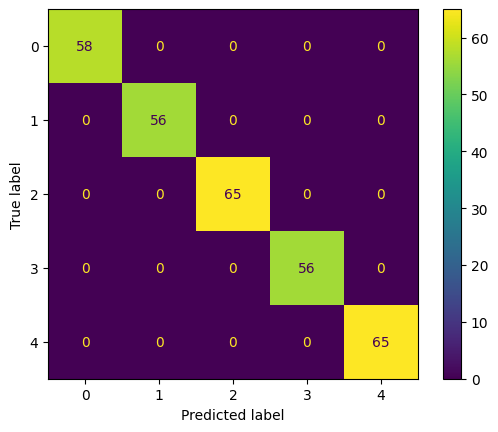

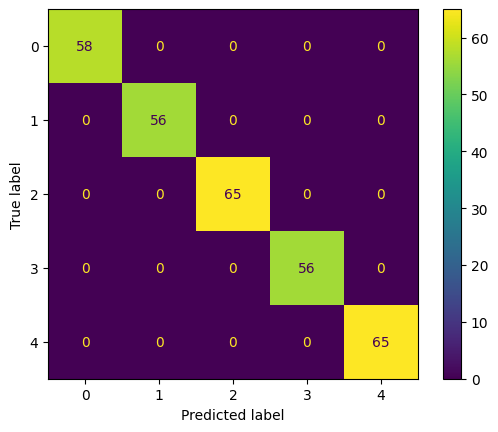

In [ ]:
svc=SVC()
nb=MultinomialNB()
models=[svc,nb]
for model in models:
  print("************",model,"************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()


week 3

In [ ]:
X_numeric = df[['Estimated_Hours','Category']].values
X = hstack((data_vec, X_numeric))
y=df['Priority']
# print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       1.00      0.98      0.99       155
           2       0.98      1.00      0.99       229

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450




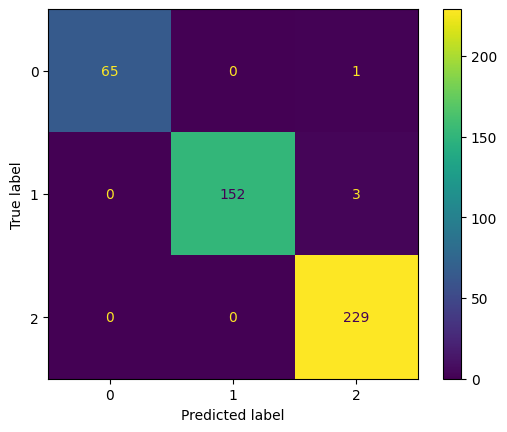

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print()

In [ ]:
df['Priority'] = df['Priority'].map({'High': 1, 'Medium': 2, 'Low': 3})
df = df.sort_values(by=['Priority', 'Estimated_Hours'], ascending=[True, False])

team_members = ["Ryan", "julie", "john"]
workload = {member: 0 for member in team_members}
assignments = []

for _, task in df.iterrows():
    member = min(workload, key=workload.get)
    assignments.append(member)
    workload[member] += task['Estimated_Hours']

df['Assigned_To'] = assignments

print(df[['Task_Description', 'Priority', 'Estimated_Hours', 'Assigned_To']])
print("Workload Distribution:", workload)

                       Task_Description  Priority  Estimated_Hours Assigned_To
196    develop task handl databas logic       NaN               40        Ryan
270   develop task handl function modul       NaN               40       julie
723      develop task handl databas api       NaN               40        john
782        develop task handl modul api       NaN               40        Ryan
855   develop task handl backend featur       NaN               40       julie
...                                 ...       ...              ...         ...
1257       document task handl doc guid       NaN                2       julie
1286  document task handl note instruct       NaN                2        john
1298       document task handl doc guid       NaN                2        Ryan
1326  document task handl note instruct       NaN                2       julie
1412    document task handl doc summari       NaN                2        john

[1500 rows x 4 columns]
Workload Distribution: {'Ry

In [ ]:
# ---- Random Forest hyperparameter tuning ----
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_

# ---- Support Vector Classifier ----
svc_params = {
    'C': [0.5, 1, 5],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
grid_svc = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)
svc_best = grid_svc.best_estimator_

# ---- Naive Bayes ----

nb_params = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

grid_nb = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)
nb_best = grid_nb.best_estimator_

# ------------------ 9. Evaluate ------------------
models = {
    "Random Forest": rf_best,
    "SVC": svc_best,
    "Naive Bayes": nb_best
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Best Parameters:", model)
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Results:
Best Parameters: RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      0.99      0.99       155
           2       0.99      1.00      1.00       229

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

Confusion Matrix:
 [[ 66   0   0]
 [  0 153   2]
 [  0   0 229]]

SVC Results:
Best Parameters: SVC(C=0.5, kernel='linear')
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       155
           2       1.00      1.00      1.00       229

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
w

In [ ]:
pickle.dump(svc, open('task_classifier_model.pkl', 'wb'))
pickle.dump(rf, open('priority_model.pkl', 'wb'))
pickle.dump(vec, open('vectorizer.pkl', 'wb'))
pickle.dump(le_category, open('le_category.pkl', 'wb'))
pickle.dump(le_Priority, open('le_Priority.pkl', 'wb'))